In [2]:
import json

import pandas as pd
#import plotly.express as px
#import geopandas as gpd

from math import sin, cos, sqrt, atan2, radians

In [3]:
# maisons = pd.read_csv('indicateurs-loyers-maisons.csv', engine='python', encoding='iso-8859-1', sep=";",decimal=",")
# maisons.head()

In [4]:
# appart = pd.read_csv('indicateurs-loyers-appartements.csv', engine='python', encoding='iso-8859-1', sep=";",decimal=",")
# appart.head()

In [5]:
"""
df = gpd.read_file("departements.geojson")

df["lon"] = df["geometry"].centroid.x
df["lat"] = df["geometry"].centroid.y
df = df.sort_values("code")
df.head()
"""

'\ndf = gpd.read_file("departements.geojson")\n\ndf["lon"] = df["geometry"].centroid.x\ndf["lat"] = df["geometry"].centroid.y\ndf = df.sort_values("code")\ndf.head()\n'

In [6]:
"""maisons["DEP"] = maisons["DEP"].str.zfill(2)
appart["DEP"]  = appart["DEP"].str.zfill(2)"""

'maisons["DEP"] = maisons["DEP"].str.zfill(2)\nappart["DEP"]  = appart["DEP"].str.zfill(2)'

In [7]:
"""departments = df["code"].unique()
prices = pd.DataFrame(columns=['dep','price_houses','price_appartments'])

for d in departments:
    m = maisons["loypredm2"].loc[maisons["DEP"]==d].mean()
    a = appart["loypredm2"].loc[appart["DEP"]==d].mean()
    prices = prices.append({'dep': d, 'price_houses': m,'price_appartments':a}
                           , ignore_index=True)

prices = prices.merge(df,left_on="dep",right_on="code")
prices = prices.drop(columns = ['code','geometry'])
prices.head()"""

'departments = df["code"].unique()\nprices = pd.DataFrame(columns=[\'dep\',\'price_houses\',\'price_appartments\'])\n\nfor d in departments:\n    m = maisons["loypredm2"].loc[maisons["DEP"]==d].mean()\n    a = appart["loypredm2"].loc[appart["DEP"]==d].mean()\n    prices = prices.append({\'dep\': d, \'price_houses\': m,\'price_appartments\':a}\n                           , ignore_index=True)\n\nprices = prices.merge(df,left_on="dep",right_on="code")\nprices = prices.drop(columns = [\'code\',\'geometry\'])\nprices.head()'

In [8]:
"""with open("departements.geojson","r") as f:
    cities = json.load(f)
    
for feature in cities["features"]:
    feature["id"] = feature["properties"]["code"] """

'with open("departements.geojson","r") as f:\n    cities = json.load(f)\n    \nfor feature in cities["features"]:\n    feature["id"] = feature["properties"]["code"] '

In [9]:
"""fig = px.choropleth_mapbox(prices,
                           geojson=cities,
                           locations="dep",
                           hover_name='nom',
                           color="price_houses",
                           zoom=4.5, center = {"lat": 46.68, "lon": 2.17},
                           mapbox_style="open-street-map")
fig.show()"""

'fig = px.choropleth_mapbox(prices,\n                           geojson=cities,\n                           locations="dep",\n                           hover_name=\'nom\',\n                           color="price_houses",\n                           zoom=4.5, center = {"lat": 46.68, "lon": 2.17},\n                           mapbox_style="open-street-map")\nfig.show()'

In [10]:
"""fig = px.choropleth_mapbox(prices,
                           geojson=cities,
                           locations="dep",
                           hover_name='nom',
                           color="price_appartments",
                           zoom=4.5, center = {"lat": 46.68, "lon": 2.17},
                           mapbox_style="open-street-map")
fig.show()"""

'fig = px.choropleth_mapbox(prices,\n                           geojson=cities,\n                           locations="dep",\n                           hover_name=\'nom\',\n                           color="price_appartments",\n                           zoom=4.5, center = {"lat": 46.68, "lon": 2.17},\n                           mapbox_style="open-street-map")\nfig.show()'

In [11]:
"""dist = df['geometry'].distance(df['geometry'][0])[68]
dist"""

"dist = df['geometry'].distance(df['geometry'][0])[68]\ndist"

In [12]:
"""def EarthDistanceKm (lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373.0
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return(distance)"""

'def EarthDistanceKm (lat1,lon1,lat2,lon2):\n    # approximate radius of earth in km\n    R = 6373.0\n    dlon = lon2 - lon1\n    dlat = lat2 - lat1\n    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2\n    c = 2 * atan2(sqrt(a), sqrt(1 - a))\n    distance = R * c\n    return(distance)'

In [13]:
"""from math import sin, cos, sqrt, atan2, radians

lat1 = radians(46.099812)
lon1 = radians(5.348752)
lat2 = radians(49.561100)
lon2 = radians(3.559649)

distance = EarthDistanceKm (lat1,lon1,lat2,lon2)

print("Result:", distance)
print("Should be:", dist, "km")"""

'from math import sin, cos, sqrt, atan2, radians\n\nlat1 = radians(46.099812)\nlon1 = radians(5.348752)\nlat2 = radians(49.561100)\nlon2 = radians(3.559649)\n\ndistance = EarthDistanceKm (lat1,lon1,lat2,lon2)\n\nprint("Result:", distance)\nprint("Should be:", dist, "km")'

In [14]:
"""dist * 6373.0"""

'dist * 6373.0'

In [15]:
"""from sklearn.metrics.pairwise import haversine_distances

haversine_distances([[lat1,lon2], [lat2,lon2]]) * 6373.0"""

'from sklearn.metrics.pairwise import haversine_distances\n\nhaversine_distances([[lat1,lon2], [lat2,lon2]]) * 6373.0'

# Loading data

/home/jj/Documents/Logement Hackathon Parietal/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<AxesSubplot:title={'center':'prix_m2'}>]], dtype=object)

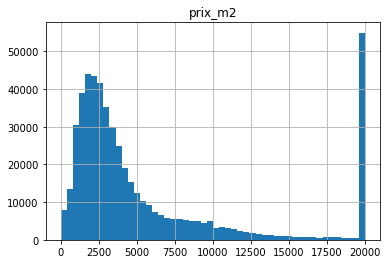

In [16]:
import numpy as np

pd.read_csv("data/dvf-subset-2018-geo.csv").query(
    "prix_m2 == prix_m2 and latitude == latitude and longitude == longitude")[['prix_m2']].clip(1, 20000).hist(bins=50)

In [17]:
new_data = pd.read_csv("data/dvf-subset-2018-geo.csv").query(
    "prix_m2 == prix_m2 and latitude == latitude and longitude == longitude and prix_m2 < 20000")

/home/jj/Documents/Logement Hackathon Parietal/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [19]:
# pd.concat((X, target), axis=1)

In [20]:
new_data.head()

,date_mutation,valeur_fonciere,code_postal,code_commune,code_departement,nom_commune,nombre_pieces_principales,surface_reelle_bati,longitude,latitude,prix_m2
0,2018-01-03,109000.0,1000.0,1053,1,Bourg-en-Bresse,4.0,73.0,5.220463,46.200053,1493.150685
1,2018-01-04,67000.0,1000.0,1053,1,Bourg-en-Bresse,1.0,45.0,5.236839,46.201145,1488.888889
2,2018-01-11,76200.0,1000.0,1053,1,Bourg-en-Bresse,3.0,68.0,5.226492,46.191168,1120.588235
3,2018-01-18,65000.0,1000.0,1053,1,Bourg-en-Bresse,3.0,69.0,5.220652,46.193394,942.028986
4,2018-01-10,47600.0,1000.0,1053,1,Bourg-en-Bresse,2.0,45.0,5.217598,46.199177,1057.777778


In [21]:
# np.median(target)

In [22]:
subset_data = new_data.groupby('nom_commune').agg({
    'longitude': 'first', 'latitude': 'first', 'prix_m2': 'median'})

In [23]:
subset_data.shape

(9332, 3)

In [24]:
subset_data

,longitude,latitude,prix_m2
nom_commune,,,
Abbeville,1.830747,50.106891,2120.772947
Abbévillers,6.920613,47.429274,1625.000000
Abeilhan,3.295414,43.449242,1633.333333
Ablain-Saint-Nazaire,2.709577,50.392692,2704.830054
Ablis,1.833085,48.516725,4347.826087
...,...,...,...
Île-Tudy,-4.169088,47.839889,3052.380952
Île-aux-Moines,-2.850656,47.599293,5591.666667
Île-d'Houat,-2.953226,47.389722,6571.428571


In [25]:
data, target = new_data[["longitude", "latitude"]], new_data["prix_m2"]
# data, target = subset_data[["longitude", "latitude"]], subset_data["prix_m2"]

In [26]:
target.shape, data.shape

((464738,), (464738, 2))

In [27]:
target = np.clip(target, 1, 30000)

In [28]:
new_data.columns

Index(['date_mutation', 'valeur_fonciere', 'code_postal', 'code_commune',
       'code_departement', 'nom_commune', 'nombre_pieces_principales',
       'surface_reelle_bati', 'longitude', 'latitude', 'prix_m2'],
      dtype='object')

In [29]:
new_data.groupby('code_departement')['prix_m2'].median()

code_departement
1     2267.528792
2     2366.197183
3     1413.154646
4     1812.135417
5     2196.969697
         ...     
29    1563.600000
2A    3109.609610
2B    2571.428571
30    2204.545455
31    2666.666667
Name: prix_m2, Length: 99, dtype: float64

(array([134856., 173684.,  66753.,  30954.,  23970.,  15785.,   8190.,
          4611.,   3331.,   2604.]),
 array([1.00000000e+00, 2.00001632e+03, 3.99903265e+03, 5.99804897e+03,
        7.99706529e+03, 9.99608162e+03, 1.19950979e+04, 1.39941143e+04,
        1.59931306e+04, 1.79921469e+04, 1.99911632e+04]),
 <BarContainer object of 10 artists>)

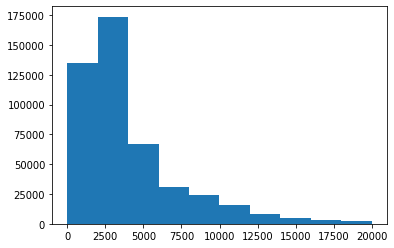

In [31]:
import matplotlib.pyplot as plt

plt.hist(target)

# Predicting features

In [33]:
# data, target = prices[["lon","lat"]], prices["price_houses"]

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464738 entries, 0 to 530398
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   longitude  464738 non-null  float64
 1   latitude   464738 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


In [37]:
# prices.head()

In [38]:
# prices.hist()

In [40]:
# new_main

In [41]:
scaled = scaler.fit_transform(data)

In [42]:
#scaled
target.describe()

count    464738.000000
mean       4036.420518
std        3374.712616
min           1.000000
25%        1838.235294
50%        2936.507937
75%        4940.683256
max       19991.163235
Name: prix_m2, dtype: float64

In [43]:
def displayres(v):
    return -scores.mean(), np.sqrt(-scores).mean(), 1.96 * np.sqrt(-scores).std()

In [45]:
# scores.mean(), scores.std()
# scores

In [46]:
#plt.hist(scores)

In [47]:
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

dummy = DummyRegressor(strategy="mean")
scores = cross_val_score(dummy, scaled, target, cv=cv, scoring="neg_mean_squared_error")
print("The mean cross-validation accuracy is: "
      f"{-scores.mean():.3f} +/- {1.96*scores.std():.3f}")
displayres(scores)

The mean cross-validation accuracy is: 11389781.395 +/- 112304.898


(11389781.394591067, 3374.864360201839, 16.624778520208924)

In [48]:
from collections import Counter

dummy.fit(scaled, target)
Counter(dummy.predict(scaled).tolist())

Counter({4036.420517725589: 464738})

In [49]:
from sklearn import set_config
set_config(display='diagram')

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

numeric_features = ['latitude', 'longitude']
numeric_transformer = StandardScaler()

categorical_features = ['nom_commune', 'nombre_pieces_principales']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# categorical_transformer = HashingVectorizer(n_features=9)

# simple_categorical = ['nombre_pieces_principales']
# simple_cat_transformer = MaxAbsScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('city / nb_rooms', categorical_transformer, categorical_features),
    ])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('lat / lon', numeric_transformer, numeric_features),
    ])

estimators = [
    ('categorical', preprocessor),
    ('linear', LinearRegression())
]
pipe = Pipeline(estimators)

estimators2 = [
    ('continuous', preprocessor2),
    ('knn', KNeighborsRegressor(n_neighbors=25, weights="distance"))
     # RandomForestRegressor(n_estimators=10))
]
pipe2 = Pipeline(estimators2)

In [53]:
sr = StackingRegressor(estimators=[('linear model', pipe), ('k-nearest-neighbors', pipe2)])

sr

StackingRegressor(estimators=[('linear model',
                               Pipeline(steps=[('categorical',
                                                ColumnTransformer(transformers=[('city '
                                                                                 '/ '
                                                                                 'nb_rooms',
                                                                                 OneHotEncoder(handle_unknown='ignore'),
                                                                                 ['nom_commune',
                                                                                  'nombre_pieces_principales'])])),
                                               ('linear',
                                                LinearRegression())])),
                              ('k-nearest-neighbors',
                               Pipeline(steps=[('continuous',
                                                ColumnTransformer(transformers=[('lat '
                                                                                 '/ '
                                                                                 'lon',
                                                                                 StandardScaler(),
                                                                                 ['latitude',
                                                                                  'longitude'])])),
                                               ('knn',
                                                KNeighborsRegressor(n_neighbors=25,
                                                                    weights='distance'))]))])

In [54]:
X = new_data[["nom_commune", "latitude", "longitude", "nombre_pieces_principales"]]

preprocessor.fit_transform(X).shape, preprocessor2.fit_transform(X).shape,

((464738, 9364), (464738, 2))

In [ ]:
%%time
scores = cross_val_score(sr, X, target, cv=cv, scoring="neg_mean_squared_error")
print("For powered lin reg + nb pieces we find that" )
print("The mean cross-validation accuracy is: "
  f"{-scores.mean():.3f} +/- {scores.std():.3f}")
displayres(scores)

In [56]:
5262118 ** 0.5

2293.9306877061476

In [57]:
X.nunique()

nom_commune                    9332
latitude                     194868
longitude                    198724
nombre_pieces_principales        32
dtype: int64

In [58]:
X[['latitude', 'longitude', 'nom_commune']].head()

,latitude,longitude,nom_commune
0,46.200053,5.220463,Bourg-en-Bresse
1,46.201145,5.236839,Bourg-en-Bresse
2,46.191168,5.226492,Bourg-en-Bresse
3,46.193394,5.220652,Bourg-en-Bresse
4,46.199177,5.217598,Bourg-en-Bresse


In [59]:
preprocessor.fit_transform(X).shape

(464738, 9364)

In [ ]:
scores = cross_val_score(pipe, X, target, cv=cv, scoring="neg_mean_squared_error")
print("For powered lin reg we find that" )
print("The mean cross-validation accuracy is: "
  f"{-scores.mean():.3f} +/- {scores.std():.3f}")
print(displayres(scores))

In [ ]:
scores = cross_val_score(pipe2, X, target, cv=cv, scoring="neg_mean_squared_error")
print("For powered lin reg + nb pieces we find that" )
print("The mean cross-validation accuracy is: "
  f"{-scores.mean():.3f} +/- {scores.std():.3f}")
print(displayres(scores))

In [113]:
scores = cross_val_score(pipe2, X, target, cv=cv, scoring="neg_mean_squared_error")
print("For powered lin reg + nb pieces we find that" )
print("The mean cross-validation accuracy is: "
  f"{-scores.mean():.3f} +/- {scores.std():.3f}")

For powered lin reg + nb pieces we find that
The mean cross-validation accuracy is: 6644233.248 +/- 26107.115


In [61]:
X_piece = np.concatenate((scaled, X[['nombre_pieces_principales']]), axis=1)

In [44]:
%%time
rfr_small = RandomForestRegressor(n_estimators=10)

scores = cross_val_score(rfr_small, X_piece, target, cv=cv, scoring="neg_mean_squared_error")
print("For powered lin reg + nb pieces we find that" )
print("The mean cross-validation accuracy is: "
  f"{-scores.mean():.3f} +/- {scores.std():.3f}")

For powered lin reg + nb pieces we find that
The mean cross-validation accuracy is: 6623400.044 +/- 29097.163
CPU times: user 15.3 s, sys: 0 ns, total: 15.3 s
Wall time: 15.3 s


In [173]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
scores = cross_val_score(regression, scaled, target, cv=cv, scoring="neg_mean_squared_error")
print("For lin reg we find that" )
print("The mean cross-validation accuracy is: "
  f"{-scores.mean():.3f} +/- {scores.std():.3f}")

For lin reg we find that
The mean cross-validation accuracy is: 11287141.985 +/- 10725.631


In [178]:
regression.fit(scaled, target)
regression.predict(scaled)

array([4060.27119879, 4060.43791831, 4059.80802229, ..., 4192.4142411 ,
       4192.59671354, 4192.60233742])

In [189]:
for n_neigh in range (5, 46, 20):
    KNN = KNeighborsRegressor(n_neighbors=n_neigh)
    scores = cross_val_score(KNN, scaled, target, cv=cv, scoring="neg_mean_squared_error")
    print("For",n_neigh," nearest neighbors we find that" )
    print("The mean cross-validation accuracy is: "
      f"{-scores.mean():.3f} +/- {scores.std():.3f}")
    print(displayres(scores))

For 5  nearest neighbors we find that
The mean cross-validation accuracy is: 5203792.700 +/- 90412.606
(5203792.699924762, 2281.09615585487, 38.85685387202548)
For 25  nearest neighbors we find that
The mean cross-validation accuracy is: 6456190.744 +/- 58494.127
(6456190.743512077, 2540.8775138149895, 22.5360201187925)
For 45  nearest neighbors we find that
The mean cross-validation accuracy is: 6773402.430 +/- 58552.667
(6773402.430228932, 2602.5518558719914, 22.024306956697416)


In [62]:
scaled.shape

(464738, 2)

In [208]:
%%time

# Weighted KNN

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scaled = scaler.transform(data)

for n_neigh in range (25, 46, 20):
    KNN = KNeighborsRegressor(n_neighbors=n_neigh, weights = "distance", metric='haversine')
    scores = cross_val_score(KNN, scaled, target, cv=cv, scoring="neg_mean_squared_error")
    print("For",n_neigh," nearest neighbors we find that" )
    print("The mean cross-validation accuracy is: "
      f"{-scores.mean():.3f} +/- {scores.std():.3f}")
    print(displayres(scores))

For 25  nearest neighbors we find that
The mean cross-validation accuracy is: 3746809.498 +/- 163195.296
(3746809.4978273287, 1935.2099841977033, 82.5021458933991)
For 45  nearest neighbors we find that
The mean cross-validation accuracy is: 3699174.730 +/- 158614.092
(3699174.729651434, 1922.8830238810629, 80.7083668288415)
CPU times: user 4.17 s, sys: 0 ns, total: 4.17 s
Wall time: 4.17 s


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
scaled = scaler.transform(data)

for n_neigh in range (25, 46, 20):
    KNN = KNeighborsRegressor(n_neighbors=n_neigh, weights = "distance", metric='haversine')
    scores = cross_val_score(KNN, scaled, target, cv=cv, scoring="neg_mean_squared_error")
    print("For",n_neigh," nearest neighbors we find that" )
    print("The mean cross-validation accuracy is: "
      f"{-scores.mean():.3f} +/- {scores.std():.3f}")

In [63]:
5531531 ** 0.5

2351.920704445624

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X, target)

array([[<AxesSubplot:title={'center':'prix_m2'}>]], dtype=object)

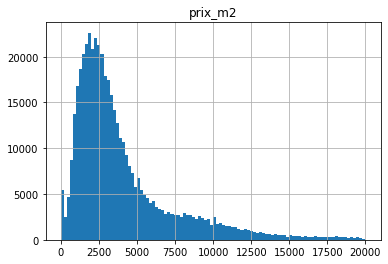

In [64]:
new_data[['prix_m2']].clip(1, 20000).hist(bins=100)

<AxesSubplot:>

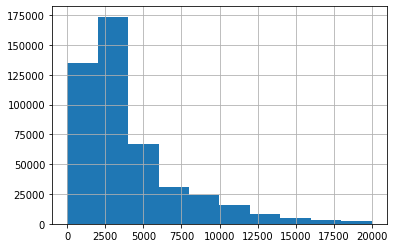

In [65]:
target.hist()

In [66]:
-scores

array([11375969.1734409 , 11316342.1267883 , 11366364.98806159,
       11490719.17984174, 11399511.5048228 ])

In [97]:
model.fit(scaled, target)
model.predict(scaled[:5]), target[:5]

(array([8.06932493, 7.46867074, 5.99482614, 9.80847266, 8.41919547]),
 0    8.548639
 1    6.941459
 2    6.076627
 3    8.232209
 4    8.014030
 Name: price_houses, dtype: float64)

In [75]:
target.head()

0    8.548639
1    6.941459
2    6.076627
3    8.232209
4    8.014030
Name: price_houses, dtype: float64

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boosting = GradientBoostingRegressor(n_estimators=200)
scores = cross_val_score(gradient_boosting, scaled, target, cv=cv, scoring="neg_mean_squared_error")
print("The mean cross-validation accuracy is: "
      f"{-scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 13.268 +/- 2.671
